## Лабораторная работа 1
### Персептроны. Процедура обучения Розенблатта
#### Тимофеев А.В., М8О-407Б-19
##### Цель работы: исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.
##### Вариант 12

In [81]:
import keras
import tensorflow as tf
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import pylab

In [82]:
features = np.array([[2.7,4.3],[-3.8,0.6],[-0.4,-4.9],[-1.7,-3.4],[2.9,-1.9],[0.2,-3.4]])
labels = np.array([0,0,1,1,1,1])

features1 = np.array([[-1.5,-0.6],[4.6,-4.6],[4.7,-3.2],[1.6,0.8],[1.7,-1.4],[1.2,3.1],[-4.9,-4.2],[4.7,1.5]])
labels1 = np.array([[0,0],[0,1],[0,1],[1,0],[0,0],[1,0],[0,1],[1,1]])

In [83]:
def drawtsk1(features, labels, drawgr, model_weights = 0, end = 0, start = 0):
    fig, ax = pylab.subplots(1, 1)
    colors = ['r' if l > 0 else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker = 'o', c = colors, s = 50, alpha = 0.8)

    minX = features[0][0]
    maxX = features[0][0]

    for itemX in features:
        if itemX[0] < minX:
            minX = itemX[0]
        elif itemX[0] > maxX:
            maxX = itemX[0]

    if drawgr:
        y1 = (-model_weights[1][0] - model_weights[0][0][0]*minX) / model_weights[0][1][0]
        y2 = (-model_weights[1][0] - model_weights[0][0][0]*maxX) / model_weights[0][1][0]
        plt.axline((minX,  y1), (maxX, y2), c = 'g')

    plt.show()

In [84]:
def drawtsk2(features, labels, drawgr, model_weights = 0, end1 = 0, start1 = 0, end2 = 0, start2 = 0):
    fig, ax = pylab.subplots(1, 1)
    colors = [0] * len(labels1)

    for i, l in enumerate(labels1):
        h = l[0] + 2 * l[1]
        if h == 0:
            colors[i] = 'r'
        if h == 1:
            colors[i] = 'b'
        if h == 2:
            colors[i] = 'y'
        if h == 3:
            colors[i] = 'm'

    ax.scatter(features[:, 0], features[:, 1], marker = 'o', c = colors, s = 50, alpha = 0.8)

    minX = features[0][0]
    maxX = features[0][0]

    for itemX in features:
        if itemX[0] < minX:
            minX = itemX[0]
        elif itemX[0] > maxX:
            maxX = itemX[0]

    if drawgr:
        y1 = (-model_weights[1][0] - model_weights[0][0][0]*minX) / model_weights[0][1][0]
        y2 = (-model_weights[1][0] - model_weights[0][0][0]*maxX) / model_weights[0][1][0]
        y3 = (-model_weights[1][0] - model_weights[0][0][1]*minX) / model_weights[0][1][1]
        y4 = (-model_weights[1][1] - model_weights[0][0][1]*maxX) / model_weights[0][1][1]
        plt.axline((minX,  y1), (maxX, y2), c = 'g')
        plt.axline((minX,  y3), (maxX, y4), c = 'g')

    plt.show()

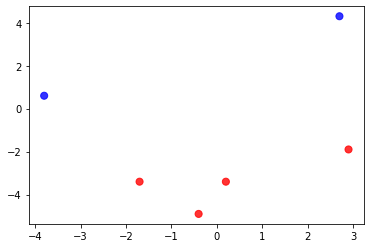

In [85]:
drawtsk1(features, labels, False)

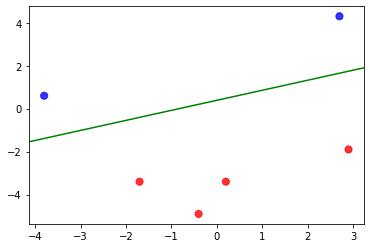

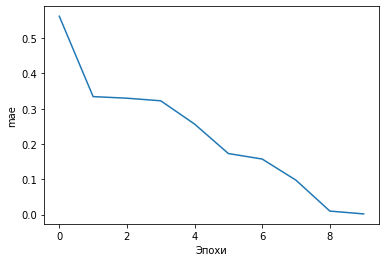

In [86]:
model = keras.models.Sequential()
model.add(Dense(1,  input_dim = 2,  activation = "sigmoid"))
model.compile(tf.keras.optimizers.Adam(0.3), 'mse', ['mae'])

hist = model.fit(features, labels, batch_size = 1, epochs = 10,verbose = 0)

drawtsk1(features, labels, True, model.get_weights(), 5)


plt.plot(hist.history["mae"])
plt.ylabel("mae")
plt.xlabel("Эпохи")
plt.show()

Epoch 1/10
6/6 [==============================] - 0s 800us/step - loss: 1.5803 - accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 0s 1ms/step - loss: 0.2636 - accuracy: 0.8333
Epoch 3/10
6/6 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 1ms/step - loss: 8.0951e-05 - accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 1000us/step - loss: 2.7440e-05 - accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 1ms/step - loss: 8.3511e-06 - accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 1ms/step - loss: 5.7171e-06 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 0s 1000us/step - loss: 5.0892e-06 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 0s 800us/step - loss: 4.4991e-06 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 0s 1000us/step - loss: 4.0767e-06 - accuracy: 1.000

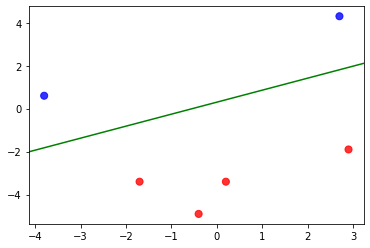

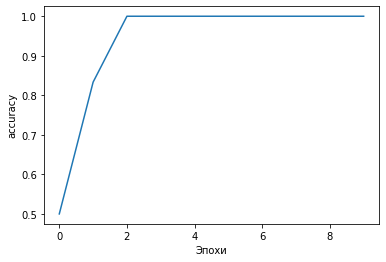

In [90]:
model = keras.models.Sequential()

model.add(Dense(1,  input_dim = 2,  activation = "sigmoid"))
model.compile(tf.keras.optimizers.Adam(0.5), 'binary_crossentropy', ['accuracy'])

hist = model.fit(features, labels, batch_size = 1, epochs = 10)

drawtsk1(features, labels, True, model.get_weights(), 7)

plt.plot(hist.history["accuracy"])
plt.ylabel("accuracy")
plt.xlabel("Эпохи")
plt.show()

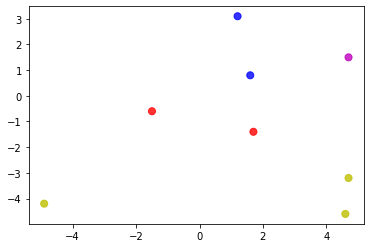

In [88]:
drawtsk2(features1, labels1, False)

Epoch 1/10
8/8 [==============================] - 0s 714us/step - loss: 0.3016 - mae: 0.4310
Epoch 2/10
8/8 [==============================] - 0s 1000us/step - loss: 0.2112 - mae: 0.2663
Epoch 3/10
8/8 [==============================] - 0s 1000us/step - loss: 0.1968 - mae: 0.2442
Epoch 4/10
8/8 [==============================] - 0s 857us/step - loss: 0.1156 - mae: 0.1774
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0942 - mae: 0.1437
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0882 - mae: 0.1366
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0811 - mae: 0.1320
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0771 - mae: 0.1271
Epoch 9/10
8/8 [==============================] - 0s 857us/step - loss: 0.0723 - mae: 0.1168
Epoch 10/10
8/8 [==============================] - 0s 1000us/step - loss: 0.0732 - mae: 0.1165


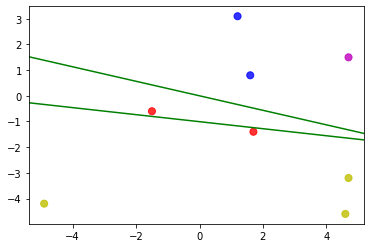

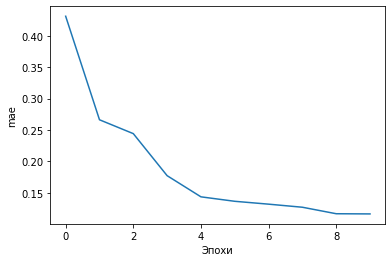

In [89]:
model = keras.models.Sequential()

model.add(Dense(2,  input_dim = 2,  activation = "sigmoid"))
model.compile(tf.keras.optimizers.Adam(0.2), 'mse', ['mae'])

hist = model.fit(features1, labels1, batch_size = 1, epochs = 10)

drawtsk2(features1, labels1, True, model.get_weights())


plt.plot(hist.history["mae"])
plt.ylabel("mae")
plt.xlabel("Эпохи")
plt.show()

### Выводы
Выполнив данную лабораторную работу, я вспомнил устройство и принцип работы персептрона, основы программирования с использованием tenserflow, а также обучил нейросети классифицировать точки.